In [1]:
from tensorflow.keras.applications import vgg16
import pandas as pd
import numpy as np
from tensorflow.keras.utils import load_img
import matplotlib.pyplot as plt

In [2]:
pretrained_model = vgg16.VGG16(weights="imagenet")

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
pretrained_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
path= r"/content/imagenet_class_index (1).json"
classes = pd.read_json(path)
classes = classes.T[[1]]
classes_dict = classes.to_dict()[1]

classes.columns = ["name"]

### Inferencing

In [5]:
def prepare_data(input_path = None):
    img_1 = load_img(input_path,target_size=(224,224))
    img_1 = np.array(img_1)
    plt.imshow(img_1)
    img_1 = vgg16.preprocess_input(img_1)
    img_1 = img_1.reshape(-1, 224, 224, 3)
    return img_1

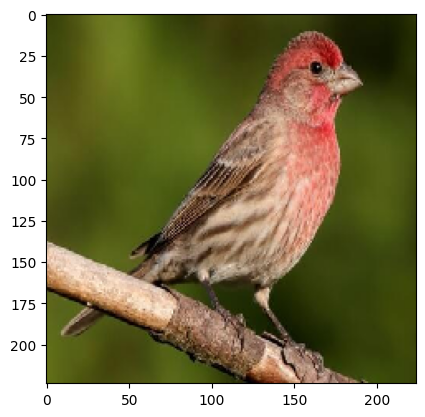

In [6]:
# image_path = r"C:\Users\phani\OneDrive\Desktop\vgg16_1.jpg"
image_path = r"/content/vgg16_2.jpg"
image = prepare_data(image_path)

In [7]:
preds = pretrained_model.predict(image)
classes.loc[:, "preds"] = np.round(preds[0], 4)
classes.sort_values(by="preds", ascending=False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 986ms/step


,name,preds
12,house_finch,0.9996
10,brambling,0.0004
670,motor_scooter,0.0000
669,mosquito_net,0.0000
668,mosque,0.0000
...,...,...
340,zebra,0.0000
341,hog,0.0000
342,wild_boar,0.0000
343,warthog,0.0000


### Finetuning

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [9]:
pretrained_model = vgg16.VGG16(weights="imagenet")

In [10]:
def prepare_data(input_path = None, batch = True):
    img_1 = load_img(input_path,target_size=(224,224))
    img_1 = np.array(img_1)
    # plt.imshow(img_1)
    img_1 = vgg16.preprocess_input(img_1)
    if batch:
        img_1 = img_1.reshape(224, 224, 3)
    else:
        img_1 = img_1.reshape(-1, 224, 224, 3)
    return img_1

In [11]:
pretrained_model.layers

[<InputLayer name=input_layer_1, built=True>,
 <Conv2D name=block1_conv1, built=True>,
 <Conv2D name=block1_conv2, built=True>,
 <MaxPooling2D name=block1_pool, built=True>,
 <Conv2D name=block2_conv1, built=True>,
 <Conv2D name=block2_conv2, built=True>,
 <MaxPooling2D name=block2_pool, built=True>,
 <Conv2D name=block3_conv1, built=True>,
 <Conv2D name=block3_conv2, built=True>,
 <Conv2D name=block3_conv3, built=True>,
 <MaxPooling2D name=block3_pool, built=True>,
 <Conv2D name=block4_conv1, built=True>,
 <Conv2D name=block4_conv2, built=True>,
 <Conv2D name=block4_conv3, built=True>,
 <MaxPooling2D name=block4_pool, built=True>,
 <Conv2D name=block5_conv1, built=True>,
 <Conv2D name=block5_conv2, built=True>,
 <Conv2D name=block5_conv3, built=True>,
 <MaxPooling2D name=block5_pool, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=fc1, built=True>,
 <Dense name=fc2, built=True>,
 <Dense name=predictions, built=True>]

In [12]:
new_model = Sequential()
for layer in pretrained_model.layers[:-1]: # Dropping the last year
    layer.trainable = False # Freezing the layers' wts and biases
    new_model.add(layer)

new_model.add(Dense(units=1, activation="sigmoid"))

In [13]:
new_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         4,097 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,264,641 (512.18 MB)

 Trainable params: 4,097 (16.00 KB)

 Non-trainable params: 134,260,544 (512.16 MB)

Loading the dataset

In [22]:
planes_paths = '/content/Planes'
cars_paths = '/content/Cars'

In [23]:
import os
X = []
y = []

# For planes
for filename in os.listdir(planes_paths):
    file_path = os.path.join(planes_paths, filename)
    X.append(prepare_data(file_path))
    y.append(0)  # Planes: 0

# For cars
for filename in os.listdir(cars_paths):
    file_path = os.path.join(cars_paths, filename)
    X.append(prepare_data(file_path))
    y.append(1)  # Cars: 1

In [30]:
#X = []
#y = []
#for i in range(len(planes_paths)):
#    X.append(prepare_data(planes_paths[i]))
#    y.append(0) # Planes : 0 , Cars : 1

#for i in range(len(cars_paths)):
#    X.append(prepare_data(cars_paths[i]))
#    y.append(1) # Planes : 0 , Cars : 1

In [24]:
X = np.array(X)
y = np.array(y)

In [25]:
print(X.shape)
print(y.shape)

(100, 224, 224, 3)
(100,)


In [26]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [27]:
new_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
new_model.fit(x=X, y = y, validation_split=0.3, batch_size=32, epochs=5, shuffle=True)

Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 66s 22s/step - accuracy: 0.6599 - loss: 0.6462 - val_accuracy: 0.8333 - val_loss: 0.3839
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 81s 21s/step - accuracy: 0.9811 - loss: 0.1184 - val_accuracy: 0.9333 - val_loss: 0.0979
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 81s 21s/step - accuracy: 1.0000 - loss: 0.0218 - val_accuracy: 1.0000 - val_loss: 0.0402
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 80s 20s/step - accuracy: 1.0000 - loss: 0.0078 - val_accuracy: 1.0000 - val_loss: 0.0232
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 64s 23s/step - accuracy: 1.0000 - loss: 0.0054 - val_accuracy: 1.0000 - val_loss: 0.0173


Inferencing

In [28]:
image_for_pred = prepare_data(input_path=r"/content/vgg_16_4 (1).jpg", batch=False)

In [29]:
new_model.predict(image_for_pred) # PLanes : 0 , Cars : 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 852ms/step


array([[0.00310426]], dtype=float32)

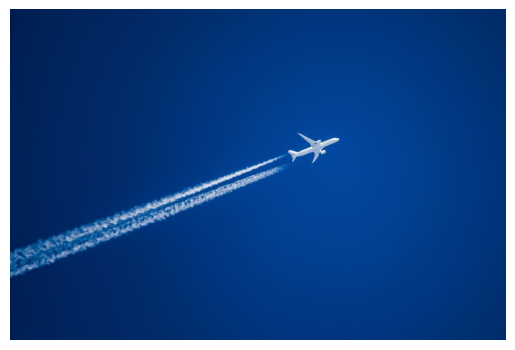

In [32]:
img = load_img('/content/vgg_16_4 (1).jpg')

plt.imshow(img)
plt.axis('off')
plt.show()


In [33]:
image_for_pred2 = prepare_data(input_path=r"/content/vgg_16_3.jpg", batch=False)

In [34]:
new_model.predict(image_for_pred2) # PLanes : 0 , Cars : 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step


array([[0.99727476]], dtype=float32)

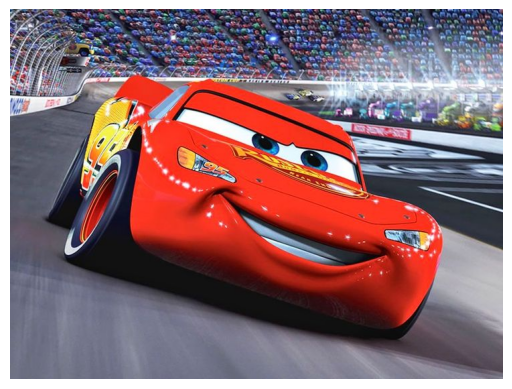

In [35]:
img = load_img('/content/vgg_16_3.jpg')

plt.imshow(img)
plt.axis('off')
plt.show()
